# Shifted Grid Tests

## 3 Runs:
  - normal (Fortran)
  - shifted (everything else standard)
  - full improved (shifted, Richardson-Fermions, Coeffs-Bosons, γ-tail improve)

## Open Problems

  - <del>First and last 2 frequencies for computation 3 are bad (reason?)</del>
      - <del>use old ν range sP.n_iν-sP.shift*(trunc(Int,sP.n_iω/2) )) ?</del>
      - cause: ω(ν) summation (skewed grid needs ν dependent ω summation)
  - <del>Σ_ladderLoc does not match Σ_DMFT for computation 2 and 3</del>
      - <del>γ .- γ2 could be a reason </del>
      - cause: wrong index conversion between Matsubara and base one
  - No coeffs for EoM

In [1]:
ENV["GKS_ENCODING"] = "utf-8"
using Plots
using LadderDGA
using Logging
using LaTeXStrings

io = stdout#devnull#stdout
metafmt(level::Logging.LogLevel, _module, group, id, file, line) = Logging.default_metafmt(level, nothing, group, id, nothing, nothing)
logger = ConsoleLogger(io, Logging.Info, meta_formatter=metafmt, show_limited=true, right_justify=0)
global_logger(logger);

┌ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b]
└ @ Base loading.jl:1317


In [2]:
cfg_file = "/home/julian/Hamburg/lDGA_shift_tests/data/20_20_s0_b12_u1.0/config_j.toml";
cfg_file2 = "/home/julian/Hamburg/lDGA_shift_tests/data/20_20_s1_b12_u1.0/config_j.toml";
cfg_file3 = "/home/julian/Hamburg/lDGA_shift_tests/data/20_20_s1_b12_u1.0/config_j_s.toml";

mP, sP, env, kGrids, qGridLoc, freqList = readConfig(cfg_file)
kG = kGrids[1]
νGrid, sumHelper_f, impQ_sp, impQ_ch, GImp, GLoc, GLoc_fft, Σ_loc, FUpDo  = setup_LDGA(kG, freqList, mP, sP, env);

mP2, sP2, env2, kGrids2, qGridLoc2, freqList2 = readConfig(cfg_file2)
kG2 = kGrids2[1]
νGrid2, sumHelper_f2, impQ_sp2, impQ_ch2, GImp2, GLoc2, GLoc_fft2, Σ_loc2, FUpDo2 = setup_LDGA(kG2, freqList2, mP2, sP2, env2);


mP3, sP3, env3, kGrids3, qGridLoc3, freqList3 = readConfig(cfg_file3)
kG3 = kGrids3[1]
νGrid3, sumHelper_f3, impQ_sp3, impQ_ch3, GImp3, GLoc3, GLoc_fft3, Σ_loc3, FUpDo3 = setup_LDGA(kG3, freqList3, mP3, sP3, env3);

[ Info: Reading Inputs...
[ Warning: TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
[ Info: setting usable ranges of sp and ch channel from 12:30 and 12:30 to the same range of 12:30
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(12:30) = 0.1873, χLoc_ch(12:30) = 0.117 
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.15212618731682778 ?≈? 0.15212618731682775 ?=? 0.15212618731682775 ?≈? 0.25"
[ Info: Reading Inputs...
[ Warning: TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
[ Info: setting usable ranges of sp and ch channel from 12:30 and 12:30 to the same range of 12:30
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(12:30) = 0.1882, χLoc_ch(12:30) = 0.1179 
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.15306538150223747 ?≈? 0.1530653815022375 ?=? 0.1530653815022375 ?≈? 0.25"
[ Info: Reading Inputs...
[ Warning: TO

In [3]:
calc_Σ_dbg = LadderDGA.calc_Σ_dbg
# "local" correction quantities
bubbleLoc = calc_bubble(νGrid, GImp, qGridLoc, mP, sP);
locQ_sp = calc_χ_trilex(impQ_sp.Γ, bubbleLoc, qGridLoc, νGrid, sumHelper_f, mP.U, mP, sP);
locQ_ch = calc_χ_trilex(impQ_ch.Γ, bubbleLoc, qGridLoc, νGrid, sumHelper_f, -mP.U, mP, sP);
Σ_ladderLoc,Σ_ladderLoc_ω,tmp_loc = calc_Σ_dbg(locQ_sp, locQ_ch, bubbleLoc, GImp, FUpDo,
                     qGridLoc, sumHelper_f, mP, sP)
Σ_ladderLoc = Σ_ladderLoc .+ mP.n * mP.U/2.0;

bubbleLoc2 = calc_bubble(νGrid2, GImp2, qGridLoc2, mP2, sP2);
locQ_sp2 = calc_χ_trilex(impQ_sp2.Γ, bubbleLoc2, qGridLoc, νGrid2, sumHelper_f2, mP2.U, mP2, sP2);
locQ_ch2 = calc_χ_trilex(impQ_ch2.Γ, bubbleLoc2, qGridLoc, νGrid2, sumHelper_f2, -mP2.U, mP2, sP2);
Σ_ladderLoc2,Σ_ladderLoc_ω2,tmp_loc2 = calc_Σ_dbg(locQ_sp2, locQ_ch2, bubbleLoc2, GImp2, FUpDo2,
                     qGridLoc, sumHelper_f2, mP2, sP2)
Σ_ladderLoc2 = Σ_ladderLoc2 .+ mP2.n * mP2.U/2.0;

bubbleLoc3 = calc_bubble(νGrid3, GImp3, qGridLoc3, mP3, sP3);
locQ_sp3 = calc_χ_trilex(impQ_sp3.Γ, bubbleLoc3, qGridLoc3, νGrid3, sumHelper_f3, mP3.U, mP3, sP3);
locQ_ch3 = calc_χ_trilex(impQ_ch3.Γ, bubbleLoc3, qGridLoc3, νGrid3, sumHelper_f3, -mP3.U, mP3, sP3);
Σ_ladderLoc3,Σ_ladderLoc_ω3,tmp_loc3 = calc_Σ_dbg(locQ_sp3, locQ_ch3, bubbleLoc3, GImp3, FUpDo3,
                     qGridLoc3, sumHelper_f3, mP3, sP3)
Σ_ladderLoc3 = Σ_ladderLoc3 .+ mP3.n * mP3.U/2.0;

In [4]:
# non local quantities 
bubble = calc_bubble(νGrid, GLoc_fft, kG, mP, sP);
nlQ_sp = calc_χ_trilex(impQ_sp.Γ, bubble, kG, νGrid, sumHelper_f,  mP.U, mP, sP);
nlQ_ch = calc_χ_trilex(impQ_ch.Γ, bubble, kG, νGrid, sumHelper_f, -mP.U, mP, sP);

nlQ_sp_nλ = deepcopy(nlQ_sp)
nlQ_ch_nλ = deepcopy(nlQ_ch)
λ_sp, λ_spch  = λ_correction!(impQ_sp, impQ_ch, FUpDo, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch, bubble, GLoc_fft, kG, mP, sP)

# non local quantities 
bubble2 = calc_bubble(νGrid2, GLoc_fft2, kG, mP2, sP2);
nlQ_sp2 = calc_χ_trilex(impQ_sp2.Γ, bubble2, kG, νGrid2, sumHelper_f2,  mP2.U, mP2, sP2);
nlQ_ch2 = calc_χ_trilex(impQ_ch2.Γ, bubble2, kG, νGrid2, sumHelper_f2, -mP2.U, mP2, sP2);

nlQ_sp2_nλ = deepcopy(nlQ_sp2)
nlQ_ch2_nλ = deepcopy(nlQ_ch2)
λ_sp2, λ_spch2  = λ_correction!(impQ_sp2, impQ_ch2, FUpDo2, Σ_loc2, Σ_ladderLoc2, nlQ_sp2, nlQ_ch2, bubble2, GLoc_fft2, kG, mP2, sP2)

# non local quantities 
bubble3 = calc_bubble(νGrid3, GLoc_fft3, kG3, mP3, sP3);
nlQ_sp3 = calc_χ_trilex(impQ_sp3.Γ, bubble3, kG3, νGrid3, sumHelper_f3,  mP3.U, mP3, sP3);
nlQ_ch3 = calc_χ_trilex(impQ_ch3.Γ, bubble3, kG3, νGrid3, sumHelper_f3, -mP3.U, mP3, sP3);

nlQ_sp3_nλ = deepcopy(nlQ_sp3)
nlQ_ch3_nλ = deepcopy(nlQ_ch3)
λ_sp3, λ_spch3  = λ_correction!(impQ_sp3, impQ_ch3, FUpDo3, Σ_loc3, Σ_ladderLoc3, nlQ_sp3, nlQ_ch3, bubble3, GLoc_fft3, kG3, mP3, sP3)

┌ Info: Computing λsp corrected χsp, using 
│   sP.χFillType = lambda_χ_fill::ChiFillType = 1
└    as fill value outside usable ω range. = " as fill value outside usable ω range."
[ Warning: currently using min(usable_sp, usable_ch) = min(13:29,13:29) = 13:29 for all calculations. relax this?
┌ Info: Found usable intervals for non-local susceptibility of length 
│ sp: 13:29, length: 17
│ ch: 13:29, length: 17
│ usable: 13:29, length: 17
└ χch sum = 0.11236015085692581, rhs = 0.19189222377672976
┌ Info: found 
│   χ_min = -0.24463037517440542
└   ". Looking for roots in intervall $(int)" = ". Looking for roots in intervall [-0.24463037517440542, 4.892607503488108]"
┌ Info: Found λsp 
└   λsp = 0.38117985584899217
[ Info: new lambda correction: λsp=0.0 and λch=0.0
┌ Info: Computing λsp corrected χsp, using 
│   sP.χFillType = lambda_χ_fill::ChiFillType = 1
└    as fill value outside usable ω range. = " as fill value outside usable ω range."
[ Warning: currently using min(usable_sp, usabl

(0.17065680904133015, [0.0, 0.0])

# Investigation of general differences
Before going through all terms individually, we try to get an overview of the differences between normal and shifted grids

In [5]:
using Printf
ωindices = (sP.dbg_full_eom_omega || sP.ωsum_type == :full) ? (1:size(bubbleLoc,1)) : intersect(locQ_sp.usable_ω, locQ_ch.usable_ω)
ωindices2 = (sP2.dbg_full_eom_omega || sP2.ωsum_type == :full) ? (1:size(bubbleLoc2,1)) : intersect(locQ_sp2.usable_ω, locQ_ch2.usable_ω)
U = mP.U
OneToIndex_to_Freq = LadderDGA.OneToIndex_to_Freq
χsp = locQ_sp.χ
χch = locQ_ch.χ
γsp = locQ_sp.γ
γch = locQ_ch.γ
χsp2 = locQ_sp2.χ
χch2 = locQ_ch2.χ
γsp2 = locQ_sp2.γ
γch2 = locQ_ch2.γ
shift2 = 1
ωZero2 = sP2.n_iω
νZero2 = sP2.n_iν
kGrid2 = qGridLoc
Gνω = GImp
Gνω2 = GImp2
kGrid = qGridLoc
νiRange = 21:30
Σw = Array{Complex{Float64}}(undef, length(ωindices), 1, size(bubble,3))
Σw2 = Array{Complex{Float64}}(undef, length(ωindices2), 1, size(bubble2,3))
errors = Array{Complex{Float64},3}(undef, length(νiRange), length(ωindices), 6)

println("  ν     ω     Δγsp       Δχsp       Δγch       Δχch       Δtmp        Δr")
println("---------------------------------------------------------------------------- ")
for (νii,νi) in enumerate(νiRange)
    for ωi in 1:length(ωindices)
        ωₙ = ωindices[ωi]
        fsp = 1.5 .* (1 .+ U*χsp[ωₙ, :])
        fch = 0.5 .* (1 .- U*χch[ωₙ, :])
        νZerop = 0 #νZero + shift*(trunc(Int64,(ωₙ - ωZero)/2))

        fsp2 = 1.5 .* (1 .+ U*χsp2[ωₙ, :])
        fch2 = 0.5 .* (1 .- U*χch2[ωₙ, :])
        νZerop2 = 0 #νZero2 + shift2*(trunc(Int64,(ωₙ - ωZero2 - 1)/2))
        #println("wn=$(ωₙ) - $(ωZero2) => $(trunc(Int64,(ωₙ - ωZero2 - 1)/2))")
        ωn, νn = OneToIndex_to_Freq(ωi, νi, sP)
        #println("$(ωi), $(νi), $(νZerop2+νi), $(tmp_loc2[ωi,:,νZerop2+νi])")
        Kνωq = γsp[ωₙ, :, νZerop+νi]    .* fsp  .- γch[ωₙ, :, νZerop+νi]   .* fch .- 1.5 .+ 0.5 .+  tmp_loc[ωi,:, νZerop+νi]
        Σw[ωi,:, νi]  = LadderDGA.conv_fft1(kGrid, Kνωq , view(Gνω , νn + ωn,:))
        
        Kνωq2 = γsp2[ωₙ, :, νZerop2+νi] .* fsp2 .- γch2[ωₙ, :, νZerop2+νi] .* fch2 .-1.5 .+ 0.5 .+ tmp_loc2[ωi,:,νZerop2+νi]
        Σw2[ωi,:, νi] = LadderDGA.conv_fft1(kGrid, Kνωq2, view(Gνω2, νn + ωn,:))
        errors[νii, ωi, : ] = [γsp[ωₙ, 1, νZerop+νi] .- γsp2[ωₙ, 1, νZerop2+νi]
                          χsp[ωₙ, 1] - χsp2[ωₙ, 1]
                          γch[ωₙ, 1, νZerop+νi]  .- γch2[ωₙ, 1, νZerop2+νi]
                          χch[ωₙ, 1] .- χch2[ωₙ, 1]
                          tmp_loc[ωi,1, νZerop+νi] .- tmp_loc2[ωi,1, νZerop+νi]
                          (γsp[ωₙ, :, νZerop+νi] .* fsp .- γch[ωₙ, :, νZerop+νi] .* fch) .- (γsp2[ωₙ, :, νZerop2+νi] .* fsp2 .- γch2[ωₙ, :, νZerop2+νi] .* fch2)]
        out = real.(errors[νii, ωi, : ])
        #@printf "%3d   %3d   %8.5f   %8.5f   %8.5f   %8.5f   %8.5f   %8.5f\n" νn ωn out[1] out[2] out[3] out[4] out[5] out[6]
    end
end

  ν     ω     Δγsp       Δχsp       Δγch       Δχch       Δtmp        Δr
---------------------------------------------------------------------------- 


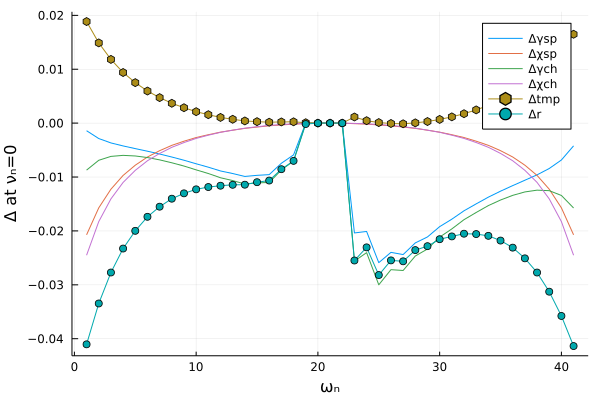

In [6]:
νi = 1
plot(real.(errors[νi,:,1]), label="Δγsp", xlabel="ωₙ", ylabel="Δ at νₙ=0")
plot!(real.(errors[νi,:,2]), label="Δχsp")
plot!(real.(errors[νi,:,3]), label="Δγch")
plot!(real.(errors[νi,:,4]), label="Δχch")
plot!(real.(errors[νi,:,5]), label="Δtmp", markershape=:hexagon)
plot!(real.(errors[νi,:,6]), label="Δr", markershape=:circle)

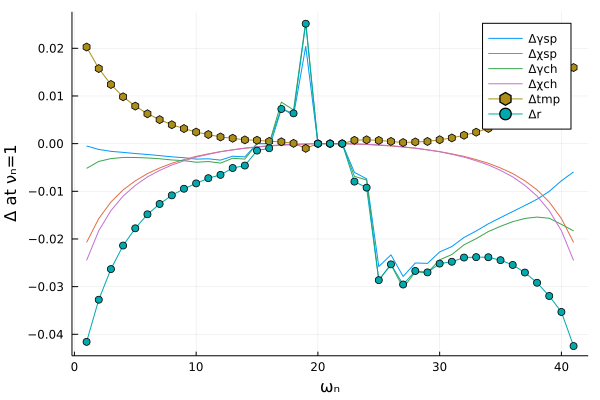

In [7]:
νi = 2
plot(real.(errors[νi,:,1]), label="Δγsp", xlabel="ωₙ", ylabel="Δ at νₙ=1")
plot!(real.(errors[νi,:,2]), label="Δχsp")
plot!(real.(errors[νi,:,3]), label="Δγch")
plot!(real.(errors[νi,:,4]), label="Δχch")
plot!(real.(errors[νi,:,5]), label="Δtmp", markershape=:hexagon)
plot!(real.(errors[νi,:,6]), label="Δr", markershape=:circle)

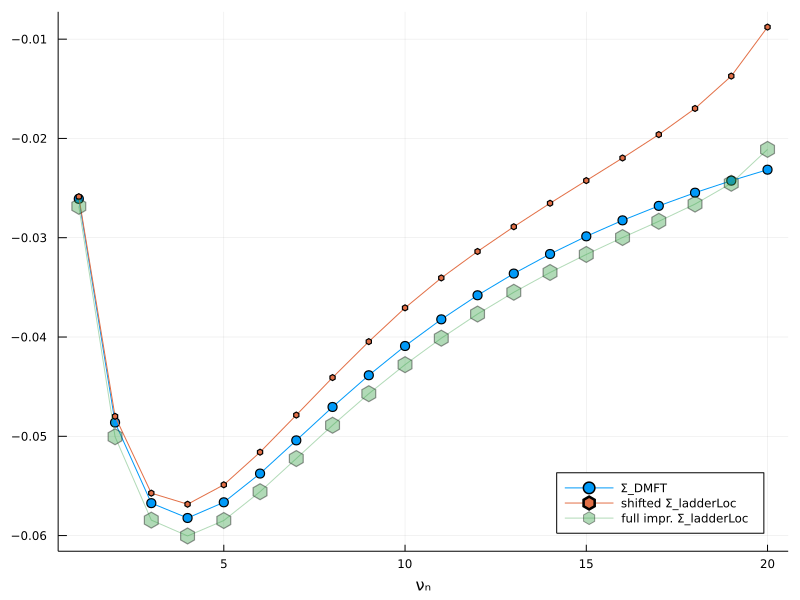

In [8]:
xarri = -20:19
xarr2 = (2 .* xarri .+ 3) .* π ./mP.β
usable_ω3 = intersect(locQ_sp3.usable_ω, locQ_ch3.usable_ω)
#(2 .* (1:20) .+ 1) .* π ./mP.β
plot(imag(Σ_loc3[1:20]), xlabel="νₙ", markershape=:circle, markersize=5, label="Σ_DMFT",size=(800,600),legend=:bottomright)
#plot!(imag(Σ_ladderLoc[sP.n_iν+1:end,1]), markershape=:circle, markersize=3, label="Σ_ladderLoc")
#plot!(imag(Σ_ladderLoc[sP.n_iν+1:end,1]), markershape=:circle, markersize=3, label="Σ_ladderLoc")
plot!(imag(Σ_ladderLoc2[sP2.n_iν+1:end,1]), markershape=:hexagon, markersize=3, label="shifted Σ_ladderLoc")
plot!(imag(Σ_ladderLoc3[sP2.n_iν+1:end,1]), markershape=:hexagon, markersize=8, alpha=0.4, label="full impr. Σ_ladderLoc")

# tmp(ω,q=0,ν!=0) Investigation

$\Sigma(\nu_{n>0})$ shows a large difference between normal and shifted grids. Possible cause is a bug in $tmp(\omega,q,\nu)$

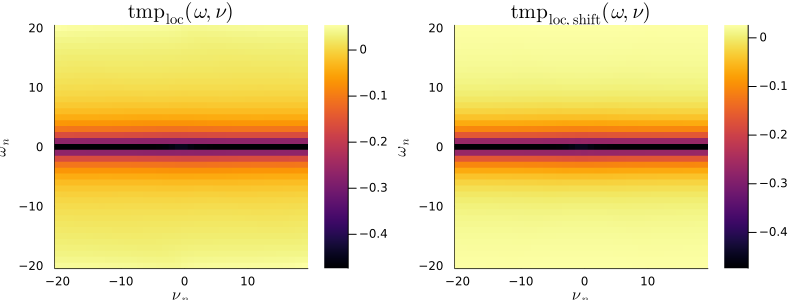

In [9]:
t = [-sP.n_iν:sP.n_iν-1,-sP.n_iω:sP.n_iω]
hms = [heatmap(t..., real(tmp_loc[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=L"\mathrm{tmp}_\mathrm{loc}(\omega,\nu)")
    heatmap(t..., real(tmp_loc2[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=L"\mathrm{tmp}_\mathrm{loc, shift}(\omega,\nu)")]
plot(hms..., layout=(1,2), size=(800,300))

In [10]:
using OffsetArrays
sum_freq_full = LadderDGA.sum_freq_full
OneToIndex_to_Freq = LadderDGA.OneToIndex_to_Freq
Naive = LadderDGA.Naive
tmp_direct = OffsetArray(zeros(Complex{Float64},2*sP.n_iω+1,2*sP.n_iν), -sP.n_iω:sP.n_iω, :)
tmp_direct2 = OffsetArray(zeros(Complex{Float64},2*sP.n_iω+1,2*sP.n_iν), -sP.n_iω:sP.n_iω, :)
tmp_direct3 = OffsetArray(zeros(Complex{Float64},2*sP.n_iω+1,2*sP.n_iν), -sP.n_iω:sP.n_iω, :)
tmp_direct4 = OffsetArray(zeros(Complex{Float64},2*sP.n_iω+1,2*sP.n_iν), -sP.n_iω:sP.n_iω, :)

for wi in axes(FUpDo,1)
    for νi in axes(FUpDo,2)
        ωn, νn = OneToIndex_to_Freq(wi,νi, sP)
        ωn, νn2 = OneToIndex_to_Freq(wi,νi, sP2)
        for νpi in axes(FUpDo,3)
            _, νpn = OneToIndex_to_Freq(wi,νpi, sP)
            _, νpn2 = OneToIndex_to_Freq(wi,νpi, sP2)
            tmp_direct[ωn,νi  ] = tmp_direct[ωn,νi]  - mP.β * FUpDo[ wi,νi,νpi] * (GImp[νpn,1]  *  GImp[νpn+ωn,1])
            tmp_direct2[ωn,νi ] = tmp_direct2[ωn,νi] - mP.β * FUpDo2[wi,νi,νpi] * GImp2[νpn2,1] * GImp2[νpn2+ωn,1]
            tmp_direct3[ωn,νi ] = tmp_direct3[ωn,νi] + FUpDo[ wi,νi,νpi] * (bubbleLoc[wi,1,νpi])
            tmp_direct4[ωn,νi ] = tmp_direct4[ωn,νi] + FUpDo2[wi,νi,νpi] * (bubbleLoc2[wi,1,νpi])
        end
    end
end

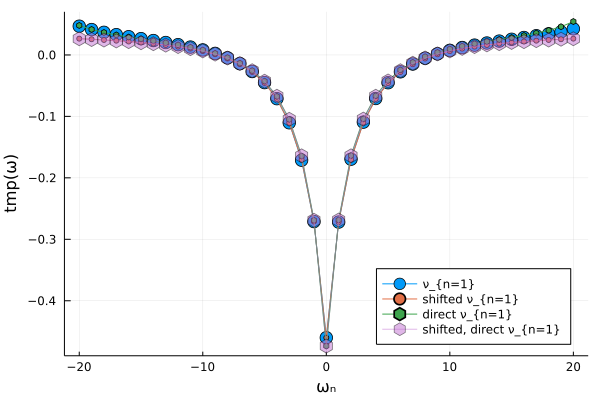

In [11]:
plot(-sP.n_iω:sP.n_iω, real(tmp_loc[:,1,22]), markersize=7, markershape=:circle, ylabel="tmp(ω)", label="ν_{n=1}", xlabel="ωₙ", legend=:bottomright)
plot!(-sP.n_iω:sP.n_iω, real(tmp_loc2[:,1,22]), markersize=3, markershape=:circle, label="shifted ν_{n=1}")
plot!(real(tmp_direct[:,1]), markersize=3, markershape=:hexagon, label="direct ν_{n=1}")
plot!(real(tmp_direct2[:,1]), markersize=7, alpha=0.5, markershape=:hexagon, label="shifted, direct ν_{n=1}")

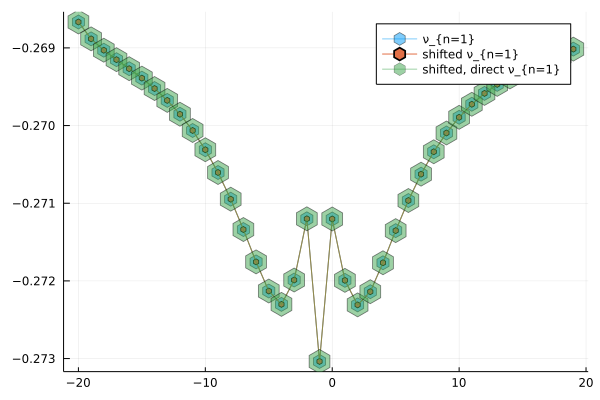

In [12]:
#plot(-sP.n_iν:sP.n_iν-1,real(tmp_loc[21,1,:]), markersize=7, markershape=:circle, ylabel="tmp(ν)",label="ν_{n=0}", xlabel="νₙ", legend=:bottomright)
#plot!(-sP.n_iν:sP.n_iν-1,real(tmp_loc2[21,1,:]), markersize=3, markershape=:circle, label="shifted ν_{n=0}")
plot(-sP.n_iν:sP.n_iν-1,real(tmp_loc[22,1,:]), markersize=7, alpha=0.5, markershape=:hexagon,  label="ν_{n=1}")
plot!(-sP.n_iν:sP.n_iν-1,real(tmp_loc2[22,1,:]), markersize=3, markershape=:hexagon, label="shifted ν_{n=1}")
#plot!(-sP.n_iν:sP.n_iν-1,real(tmp_direct[22,:]), markersize=9, alpha=0.5, markershape=:hexagon,  label="ν_{n=1}")
plot!(-sP.n_iν:sP.n_iν-1,real(tmp_direct2[1,:]), markersize=12, alpha=0.5, markershape=:hexagon, label="shifted, direct ν_{n=1}")

#plot!(real(locQ_sp.γ[end,1,:]), markershape=:square,  label="n=20")
#plot!(real(locQ_sp2.γ[end,1,:]), markershape=:square, label="shifted n=20")

# γ(ω,q=0,ν!=0) Investigation

$\Sigma(\nu_{n>0})$ shows a large difference between normal and shifted grids. Possible cause is a bug in $\gamma(\omega,q,\nu)$

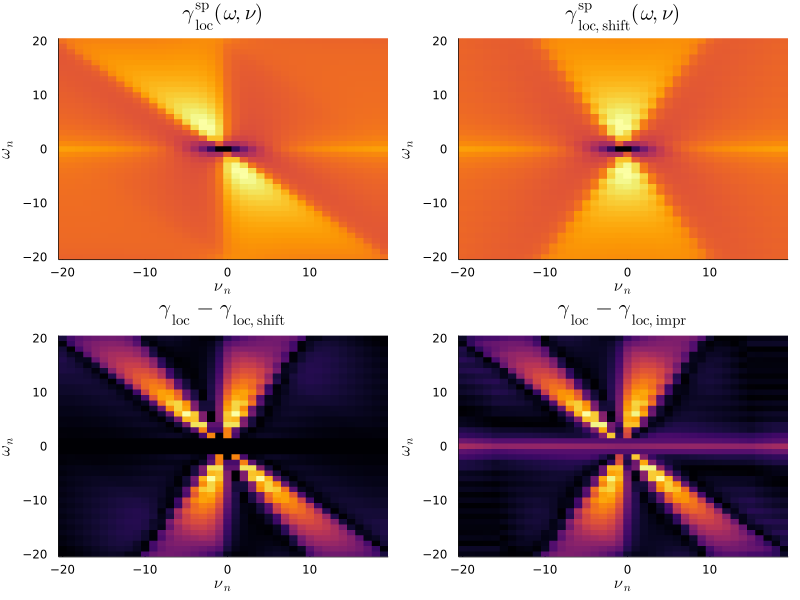

In [13]:
t = [-sP.n_iν:sP.n_iν-1,-sP.n_iω:sP.n_iω]
hms = [heatmap(t..., real(locQ_sp.γ[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=L"\gamma^\mathrm{sp}_\mathrm{loc}(\omega,\nu)")
heatmap(t..., real(locQ_sp2.γ[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=L"\gamma^\mathrm{sp}_\mathrm{loc, shift}(\omega,\nu)")
heatmap(t..., abs.(locQ_sp.γ[:,1,:] .- locQ_sp2.γ[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=L"\gamma_\mathrm{loc} - \gamma_\mathrm{loc, shift}")
heatmap(t..., abs.(locQ_sp.γ[:,1,:] .- locQ_sp3.γ[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=L"\gamma_\mathrm{loc} - \gamma_\mathrm{loc, impr}")
]

plot(hms..., layout = (2,2), colorbar = false, size=(800,600))

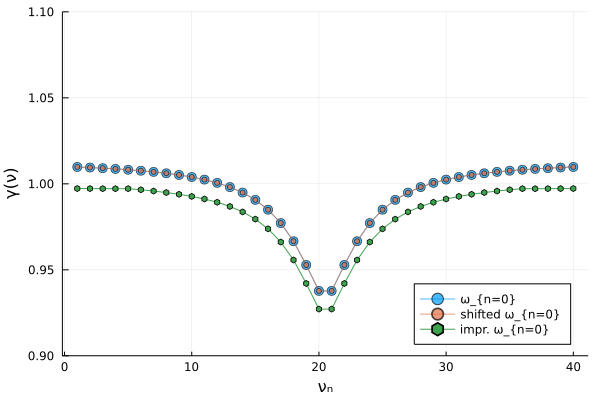

In [14]:
plot(real(locQ_sp.γ[21,1,:]), ylims=(0.9,1.1), markershape=:circle, markersize=5, alpha=0.7, ylabel="γ(ν)",label="ω_{n=0}", xlabel="νₙ", legend=:bottomright)
plot!(real(locQ_sp2.γ[21,1,:]), markershape=:circle, markersize=3, alpha=0.7, label="shifted ω_{n=0}")
plot!(real(locQ_sp3.γ[21,1,:]), markershape=:hexagon, markersize=3, label="impr. ω_{n=0}")
#plot!(real(locQ_sp.γ[21,1,:]), markershape=:square,  label="ω_{n=3}")
#plot!(real(locQ_sp3.γ[21,1,:]), markershape=:square, label="shifted ω_{n=3}")
#plot!(real(locQ_sp.γ[end,1,:]), markershape=:square,  label="n=20")
#plot!(real(locQ_sp2.γ[end,1,:]), markershape=:square, label="shifted n=20")

(1, 40)


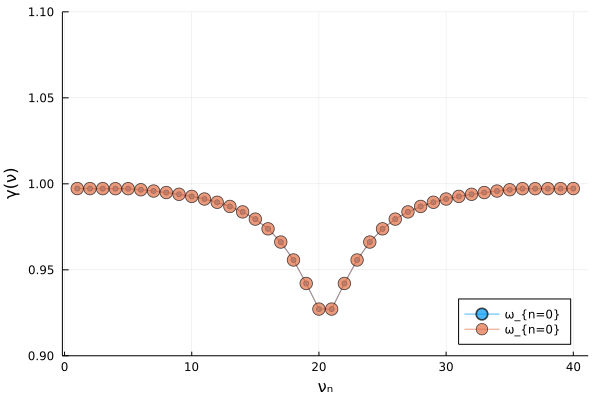

In [15]:
γtmp = deepcopy(locQ_sp3.γ)
println(LadderDGA.find_usable_γ(γtmp[21,1,:]))
plot(real(γtmp[21,1,:]), ylims=(0.9,1.1), markershape=:circle, markersize=3, alpha=0.7, ylabel="γ(ν)",label="ω_{n=0}", xlabel="νₙ", legend=:bottomright)
LadderDGA.extend_γ!(view(γtmp,21, 1, :), 2*π/mP.β, weight=0.01)
plot!(real(γtmp[21,1,:]), markershape=:circle, markersize=7, alpha=0.7, ylabel="γ(ν)",label="ω_{n=0}", xlabel="νₙ", legend=:bottomright)

In [16]:
2*π/mP.β

0.5235987755982988

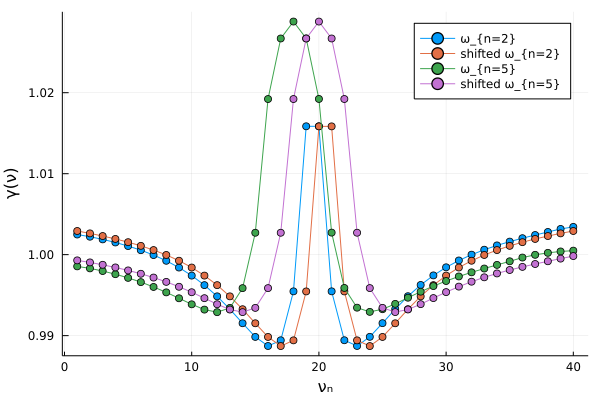

In [17]:
plot(real(locQ_sp.γ[23,1,:]), markershape=:circle, ylabel="γ(ν)", label="ω_{n=2}", xlabel="νₙ", legend=:topright)
plot!(real(locQ_sp2.γ[23,1,:]), markershape=:circle, label="shifted ω_{n=2}")
plot!(real(locQ_sp.γ[26,1,:]), markershape=:circle, ylabel="γ(ν)", label="ω_{n=5}", xlabel="νₙ")
plot!(real(locQ_sp2.γ[26,1,:]), markershape=:circle, label="shifted ω_{n=5}")

# γ(ω,q=0,ν!=0) * χ(ω,q=0) Investigation

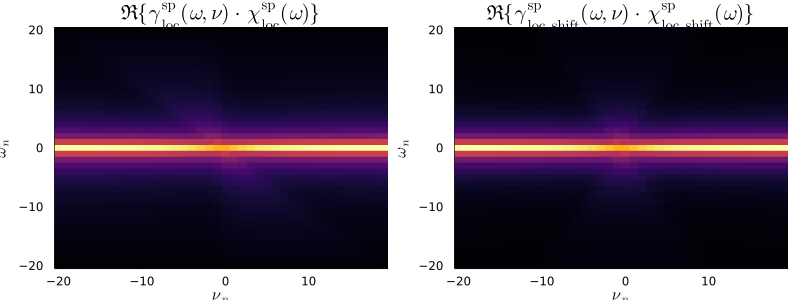

In [18]:
t = [-sP.n_iν:sP.n_iν-1,-sP.n_iω:sP.n_iω]
hms = [heatmap(t..., real(locQ_sp.γ[:,1,:] .* (1 .+ mP.U*locQ_sp.χ[:, 1])),ylabel=L"\omega_n", xlabel=L"\nu_n", title=L"\Re\{\gamma^\mathrm{sp}_\mathrm{loc}(\omega,\nu) \cdot \chi^\mathrm{sp}_\mathrm{loc}(\omega)\}")
heatmap(t..., real(locQ_sp2.γ[:,1,:] .* (1 .+ mP.U*locQ_sp2.χ[:, 1])),ylabel=L"\omega_n", xlabel=L"\nu_n", title=L"\Re\{\gamma^\mathrm{sp}_\mathrm{loc, shift}(\omega,\nu) \cdot \chi^\mathrm{sp}_\mathrm{loc, shift}(\omega)\}")]

plot(hms..., layout = (1,2), colorbar = false, size=(800,300))

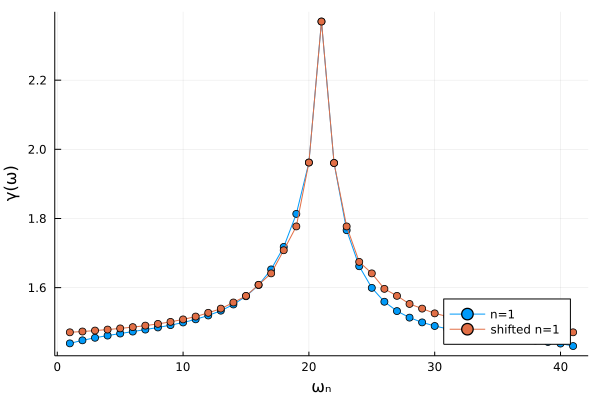

In [19]:
plot(real(locQ_sp.γ[:,1,22].* (1.5 .* (1 .+ U*locQ_sp.χ[:,1]))), ylabel="γ(ω)", markershape=:circle, label="n=1", xlabel="ωₙ", legend=:bottomright)
plot!(real(locQ_sp2.γ[:,1,22].* (1.5 .* (1 .+ U*locQ_sp2.χ[:,1]))), markershape=:circle, label="shifted n=1")

# Σ_ladderLoc_ω Investigation

compute full EoM for local case directly as

$\Sigma^\text{direct}(\nu) = \frac{U n}{2} - \frac{U}{\beta^2} \sum_{\nu'\omega} F^{\nu\nu'\omega}_{\uparrow\downarrow}G_\text{Imp}(\nu')G_\text{Imp}(\nu'+\omega)G_\text{Imp}(\nu+\omega)$

AND

$\Sigma^\text{direct,bubble}(\nu) = \frac{U n}{2} - \frac{U}{\beta^2} \sum_{\nu'\omega} F^{\nu\nu'\omega}_{\uparrow\downarrow}(-\frac{\chi_0(\omega,\nu')}{\beta}) G_\text{Imp}(\nu+\omega)$

`Σ_direct3` and `Σ_direct4` are computed using the same code as in the `LadderDGA.jl` code.

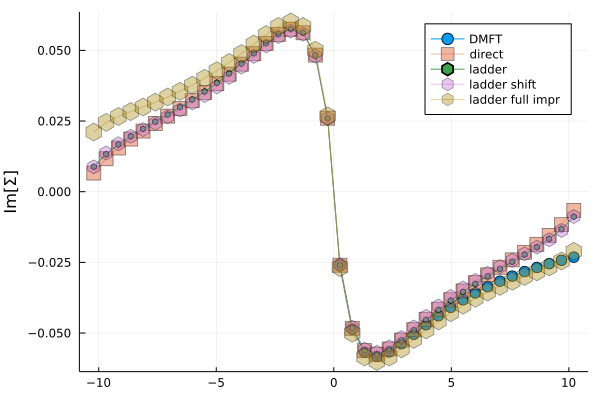

In [20]:
using OffsetArrays
sum_freq_full = LadderDGA.sum_freq_full
Naive = LadderDGA.Naive
Σ_direct = OffsetArray(zeros(Complex{Float64},4*sP.n_iν+1), -2*sP.n_iν:2*sP.n_iν)
Σ_direct2 = OffsetArray(zeros(Complex{Float64},4*sP.n_iν+1), -2*sP.n_iν:2*sP.n_iν)
Σ_direct3 = OffsetArray(zeros(Complex{Float64},4*sP.n_iν+1), -2*sP.n_iν:2*sP.n_iν)
Σ_direct4 = OffsetArray(zeros(Complex{Float64},4*sP.n_iν+1), -2*sP.n_iν:2*sP.n_iν)

Σ_direct_ω = OffsetArray(zeros(Complex{Float64},4*sP.n_iν+1), -2*sP.n_iν:2*sP.n_iν)
Σ_direct_ω2 = OffsetArray(zeros(Complex{Float64},4*sP.n_iν+1), -2*sP.n_iν:2*sP.n_iν)


Σ_direct[:] .= mP.U*mP.n/2
Σ_direct2[:] .= mP2.U*mP2.n/2
Σ_direct3[:] .= mP2.U*mP2.n/2
Σ_direct4[:] .= mP2.U*mP2.n/2
for wi in axes(FUpDo,1)
    for νi in axes(FUpDo,3)
        ωn = wi - sP.n_iω - 1
        νn = νi - sP.n_iν - 1 - trunc(Int64,sP.shift*ωn/2)
        νn2 = νi - sP.n_iν - 1 - trunc(Int64,sP2.shift*ωn/2)
        #println("ωn = $ωn, νn = $νp, νn2 = $νp2")
        for νpi in axes(FUpDo,2)
            νpn = νpi - sP.n_iν - 1 - trunc(Int64,sP.shift*ωn/2)
            νpn2 = νpi - sP.n_iν - 1 - trunc(Int64,sP2.shift*ωn/2)
            Σ_direct[νn] = Σ_direct[νn] + FUpDo[wi,νi,νpi] * GImp[νpn,1] * GImp[νpn+ωn,1] * GImp[νn+ωn,1]
            Σ_direct2[νn2] = Σ_direct2[νn2] + FUpDo2[wi,νi,νpi] * GImp2[νpn2,1] * GImp2[νpn2+ωn,1] * GImp2[νn2+ωn,1]
        end
        Σ_direct3[νn] = Σ_direct3[νn] + sum_freq_full(FUpDo[wi,νi,:] .* (-bubbleLoc[wi,1,:]/mP.β),Naive(),1.0) * GImp[νn+ωn,1]
        Σ_direct4[νn2] = Σ_direct4[νn2] + sum_freq_full(FUpDo2[wi,νi,:] .* (-bubbleLoc2[wi,1,:]/mP2.β),Naive(),1.0) * GImp2[νn2+ωn,1]

    end
end
# bubbleLoc[wi,1,νpi]

#Σ_direct[:] = Σ_direct[:] ;
#Σ_direct2[:] = +mP2.U*mP2.n .- Σ_direct2[:] ;
xarri = -sP.n_iν:(sP.n_iν-1)

plot((2 .* (0:sP.n_iν-1) .+ 1)*π/mP.β, imag(Σ_loc[1:20,1]), markershape=:circle, markersize=6, label="DMFT", ylabel="Im[Σ]")
plot!((2 .* xarri .+ 1)*π/mP.β,imag(Σ_direct[-sP.n_iν:sP.n_iν-1]), markershape=:square, markersize=7, alpha=0.5, label="direct")
#plot!((2 .* xarri .+ 1)*π/mP.β, imag(Σ_direct2[xarri]), markershape=:square, markersize=7, alpha=0.5, label="direct shift")
#plot!((2 .* xarri .+ 1)*π/mP.β,imag(Σ_direct3[-sP.n_iν:sP.n_iν-1]), markershape=:hexagon, markersize=3, alpha=0.9, label="direct, no shift, bubble")
#plot!((2 .* xarri .+ 1)*π/mP.β, imag(Σ_direct4[xarri]), markershape=:square, markersize=5, alpha=0.9, label="direct shift, bubble")

plot!((2 .* xarri .+ 1)*π/mP.β, imag(Σ_ladderLoc[:,1]), markershape=:hexagon, markersize=3, label="ladder")
plot!((2 .* xarri .+ 1)*π/mP.β, imag(Σ_ladderLoc2[:,1]), markershape=:hexagon, markersize=7, alpha=0.4, label="ladder shift")
#
plot!((2 .* xarri .+ 1)*π/mP.β, imag(Σ_ladderLoc3[:,1]), markershape=:hexagon, markersize=9, alpha=0.4, label="ladder full impr")

In [21]:
Σ_ladderLoc_ω_new = OffsetArray(Array{Complex{Float64}}(undef, 4*sP.n_iω+1, 4*sP.n_iν+1), -2*sP.n_iω:2*sP.n_iω, -2*sP.n_iν:2*sP.n_iν);
Σ_ladderLoc_ω_new[:,:] .= 0.0;
for ωi in axes(Σ_ladderLoc_ω2, 1)
    for νi in axes(Σ_ladderLoc_ω2, 3)
        ωn, νn = OneToIndex_to_Freq(ωi, νi, sP2)
        Σ_ladderLoc_ω_new[ωn, νn] = Σ_ladderLoc_ω2[ωi, 1, νi]
    end
end
Σ_ladderLoc_ω_plot_test = Σ_ladderLoc_ω_new.parent[sP.n_iω+1:end-sP.n_iω,sP.n_iν+1:end-sP.n_iν-1];

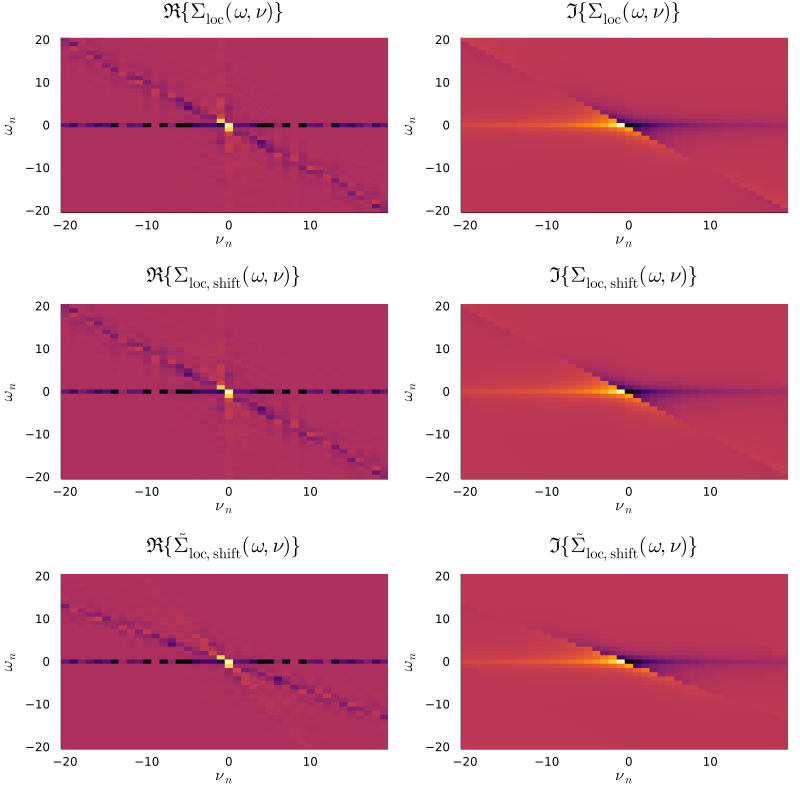

In [22]:
t = [-sP.n_iν:sP.n_iν-1,-sP.n_iω:sP.n_iω]
hms = [heatmap(t..., real(Σ_ladderLoc_ω[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=L"\Re\{\Sigma_\mathrm{loc}(\omega, \nu)\}")
 heatmap(t..., imag(Σ_ladderLoc_ω[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=L"\Im\{\Sigma_\mathrm{loc}(\omega, \nu)\}")
 heatmap(t..., real(Σ_ladderLoc_ω2[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=L"\Re\{\Sigma_\mathrm{loc, shift}(\omega, \nu)\}")
 heatmap(t..., imag(Σ_ladderLoc_ω2[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=L"\Im\{\Sigma_\mathrm{loc, shift}(\omega, \nu)\}")
 heatmap(t..., real(Σ_ladderLoc_ω_plot_test[:,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=L"\Re\{\tilde{\Sigma}_\mathrm{loc, shift}(\omega, \nu)\}")
 heatmap(t..., imag(Σ_ladderLoc_ω_plot_test[:,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=L"\Im\{\tilde{\Sigma}_\mathrm{loc, shift}(\omega, \nu)\}")
]
plot(hms..., layout = (3,2), colorbar = false, size=(800,800))

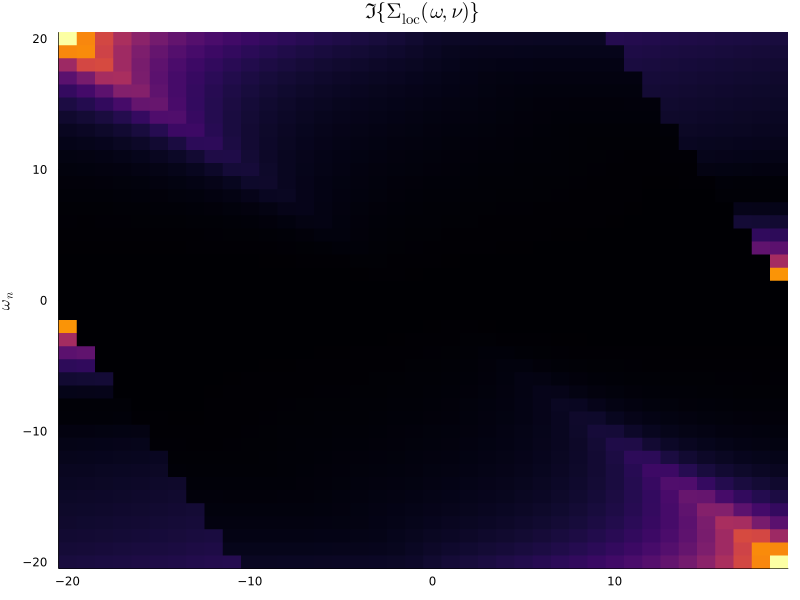

In [23]:
t = [-sP.n_iν:sP.n_iν-1,-sP.n_iω:sP.n_iω]
hms = [heatmap(t..., abs.(Σ_ladderLoc_ω[:,1,:] .- Σ_ladderLoc_ω2[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=L"\Im\{\Sigma_\mathrm{loc}(\omega, \nu)\}")
 ]
plot(hms..., layout = (1,1), xlabel="", colorbar = false, size=(800,600))

# nonlocal χ comparisons

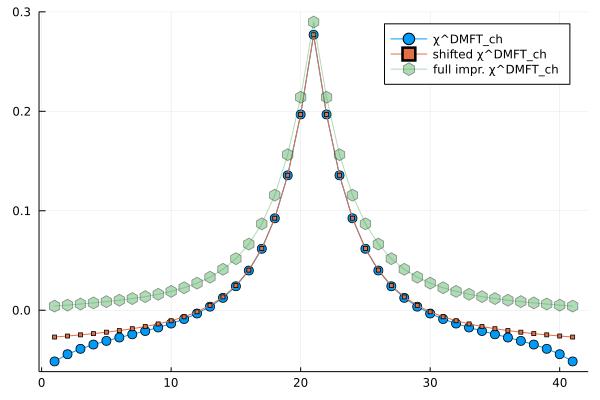

In [24]:
plot(real(locQ_ch.χ),markershape=:circle,  markersize=5, label="χ^DMFT_ch")
plot!(real(locQ_ch2.χ),markershape=:square,  markersize=2, label="shifted χ^DMFT_ch")
plot!(real(locQ_ch3.χ),markershape=:hexagon,markersize=6, alpha=0.4, label="full impr. χ^DMFT_ch")

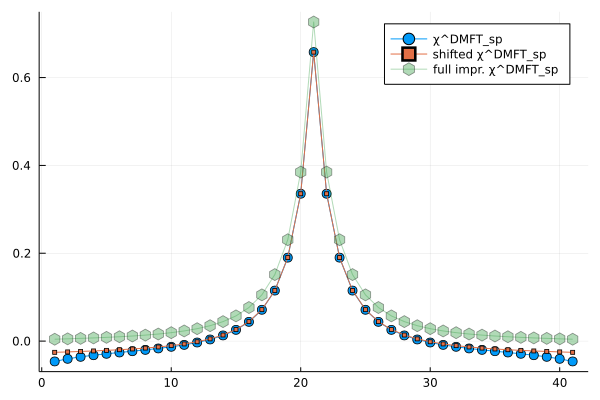

In [25]:
plot(real(locQ_sp.χ),markershape=:circle, markersize=5, alpha=1.0, label="χ^DMFT_sp")
plot!(real(locQ_sp2.χ),markershape=:square, markersize=2, alpha=1.0, label="shifted χ^DMFT_sp")
plot!(real(locQ_sp3.χ),markershape=:hexagon,markersize=6, alpha=0.4, label="full impr. χ^DMFT_sp")

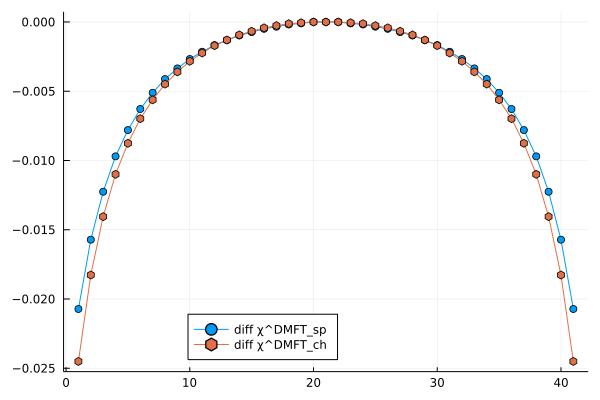

In [26]:
plot(real(locQ_sp.χ .- locQ_sp2.χ),markershape=:circle, label="diff χ^DMFT_sp", legend=:bottom)
plot!(real(locQ_ch.χ .- locQ_ch2.χ),markershape=:hexagon, label="diff χ^DMFT_ch")

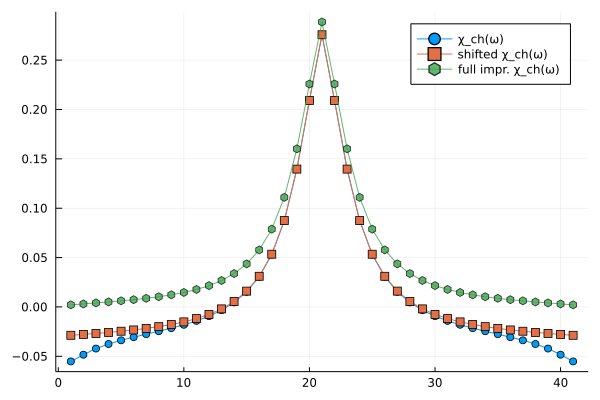

In [27]:
plot(real(LadderDGA.kintegrate(kG, nlQ_ch_nλ.χ, dim=2)[:,1]),markershape=:circle, label="χ_ch(ω)")
plot!(real(LadderDGA.kintegrate(kG, nlQ_ch2_nλ.χ, dim=2)[:,1]),markershape=:square, label="shifted χ_ch(ω)")
plot!(real(LadderDGA.kintegrate(kG, nlQ_ch3_nλ.χ, dim=2)[:,1]),markershape=:hexagon,markersize=4, alpha=0.8, label="full impr. χ_ch(ω)")

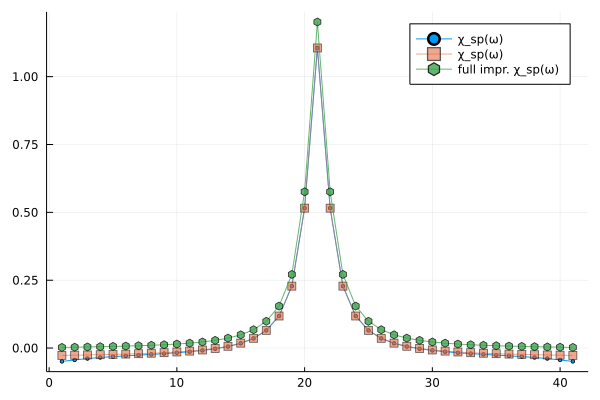

In [28]:
plot(real(LadderDGA.kintegrate(kG, nlQ_sp_nλ.χ, dim=2)[:,1]),markershape=:circle, markersize=2, label="χ_sp(ω)")
plot!(real(LadderDGA.kintegrate(kG, nlQ_sp2_nλ.χ, dim=2)[:,1]),markershape=:square, alpha=0.6, label="χ_sp(ω)")
plot!(real(LadderDGA.kintegrate(kG, nlQ_sp3_nλ.χ, dim=2)[:,1]),markershape=:hexagon,markersize=4, alpha=0.8, label="full impr. χ_sp(ω)")

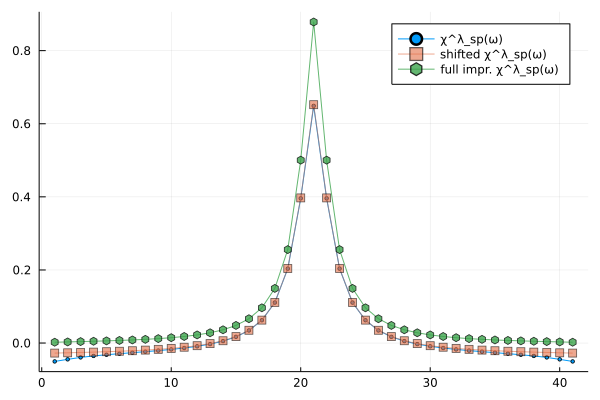

In [29]:
plot(real(LadderDGA.kintegrate(kG, nlQ_sp.χ, dim=2)[:,1]),markershape=:circle, markersize=2, label="χ^λ_sp(ω)")
plot!(real(LadderDGA.kintegrate(kG, nlQ_sp2.χ, dim=2)[:,1]),markershape=:square, alpha=0.6, label="shifted χ^λ_sp(ω)")
plot!(real(LadderDGA.kintegrate(kG, nlQ_sp3.χ, dim=2)[:,1]),markershape=:hexagon,markersize=4, alpha=0.8, label="full impr. χ^λ_sp(ω)")

# Investigation of Tail Fits in Σ(ω)

Tests not working for now. Seems to be correct and only introduce minor corrections on shifted grids.

In [30]:
Σ_ladder  = calc_Σ(nlQ_sp_nλ, nlQ_ch_nλ, bubble, GLoc, FUpDo, kG, sumHelper_f, mP, sP)
Σ_ladder_corrected = Σ_ladder .- Σ_ladderLoc[sP.n_iν+1:end] .+ Σ_loc[axes(Σ_ladder,1)]

Σ_ladder2 = calc_Σ(nlQ_sp2_nλ, nlQ_ch2_nλ, bubble2, GLoc2, FUpDo2, kG2, sumHelper_f2, mP2, sP2)
Σ_ladder_corrected2 = Σ_ladder2 .- Σ_ladderLoc2[sP2.n_iν+1:end] .+ Σ_loc[axes(Σ_ladder2,1)];

Σ_ladder3 = calc_Σ(nlQ_sp3_nλ, nlQ_ch3_nλ, bubble3, GLoc3, FUpDo3, kG3, sumHelper_f3, mP3, sP3)
Σ_ladder_corrected3 = Σ_ladder3 .- Σ_ladderLoc3[sP3.n_iν+1:end] .+ Σ_loc[axes(Σ_ladder3,1)];

In [31]:
Σ_hartree = mP.n * mP.U/2 
E_pot_tail_c = (mP.U^2 * 0.5 * mP.n * (1-0.5*mP.n) .+ Σ_hartree .* (kG.ϵkGrid .+ Σ_hartree .- mP.μ))
E_pot_tail = E_pot_tail_c' ./ (LadderDGA.iν_array(mP.β, 0:size(Σ_ladder_corrected,1)-1) .^ 2)
E_pot_tail_inv = sum((mP.β/2)  .* [Σ_hartree .* ones(size(kG.ϵkGrid)), (-mP.β/2) .* E_pot_tail_c])
t = LadderDGA.G_from_Σ(Σ_ladder_corrected .+ Σ_hartree, kG.ϵkGrid, 0:size(Σ_ladder_corrected, 1)-1, mP)
G_corr = LadderDGA.flatten_2D(t);
E_pot_s = LadderDGA.calc_E_pot(kG, G_corr, Σ_ladder_corrected, E_pot_tail, E_pot_tail_inv) / mP.β
E_kin, E_pot = LadderDGA.calc_E(Σ_ladder_corrected,kG,mP,sP);
println("EPot single = $(E_pot_s), EPot = $(E_pot), EKin = $(E_kin) Total = $(E_pot[1] + E_kin[1])")

EPot single = 0.2283042156861468, EPot = [0.2311915476041396], EKin = [-0.6014928058703951] Total = -0.3703012582662555


In [32]:
Σ_hartree2 = mP2.n * mP2.U/2 
E_pot_tail_c2 = (mP2.U^2 * 0.5 * mP2.n * (1-0.5*mP2.n) .+ Σ_hartree2 .* (kG2.ϵkGrid .+ Σ_hartree2 .- mP2.μ))
E_pot_tail2 = E_pot_tail_c2' ./ (LadderDGA.iν_array(mP2.β, 0:size(Σ_ladder_corrected2,1)-1) .^ 2)
E_pot_tail_inv2 = sum((mP2.β/2)  .* [Σ_hartree2 .* ones(size(kG.ϵkGrid)), (-mP2.β/2) .* E_pot_tail_c2])
t2 = LadderDGA.G_from_Σ(Σ_ladder_corrected2 .+ Σ_hartree2, kG.ϵkGrid, 0:size(Σ_ladder_corrected2, 1)-1, mP2)
G_corr2 = LadderDGA.flatten_2D(t2);
E_pot_s2 = LadderDGA.calc_E_pot(kG, G_corr2, Σ_ladder_corrected2, E_pot_tail2[1:size(Σ_ladder_corrected2, 1),:], E_pot_tail_inv2) / mP.β
E_kin2, E_pot2 = LadderDGA.calc_E(Σ_ladder_corrected2,kG,mP2,sP2);
println("EPot single = $(E_pot_s2), EPot = $(E_pot2), EKin = $(E_kin2), Total = $(E_pot2[1] + E_kin2[1])")

EPot single = 0.227615222940691, EPot = [0.23044062306473204], EKin = [-0.6005965671149065], Total = -0.3701559440501745


In [33]:
Σ_hartree3 = mP3.n * mP3.U/2 
E_pot_tail_c3 = (mP3.U^2 * 0.5 * mP3.n * (1-0.5*mP3.n) .+ Σ_hartree3 .* (kG3.ϵkGrid .+ Σ_hartree3 .- mP3.μ))
E_pot_tail3 = E_pot_tail_c3' ./ (LadderDGA.iν_array(mP3.β, 0:size(Σ_ladder_corrected3,1)-1) .^ 2)
E_pot_tail_inv3 = sum((mP3.β/2)  .* [Σ_hartree3 .* ones(size(kG3.ϵkGrid)), (-mP3.β/2) .* E_pot_tail_c3])
t3 = LadderDGA.G_from_Σ(Σ_ladder_corrected3 .+ Σ_hartree3, kG3.ϵkGrid, 0:size(Σ_ladder_corrected3, 1)-1, mP3)
G_corr3 = LadderDGA.flatten_2D(t3);
E_pot_s3 = LadderDGA.calc_E_pot(kG3, G_corr3, Σ_ladder_corrected3, E_pot_tail3[1:size(Σ_ladder_corrected3, 1),:], E_pot_tail_inv2) / mP.β
E_kin3, E_pot3 = LadderDGA.calc_E(Σ_ladder_corrected3,kG3,mP3,sP3);
println("EPot single = $(E_pot_s3), EPot = $(E_pot3), EKin = $(E_kin3), Total = $(E_pot3[1] + E_kin3[1])")

EPot single = 0.23003491963714662, EPot = [0.232876143580091], EKin = [-0.6007684788670357], Total = -0.36789233528694465


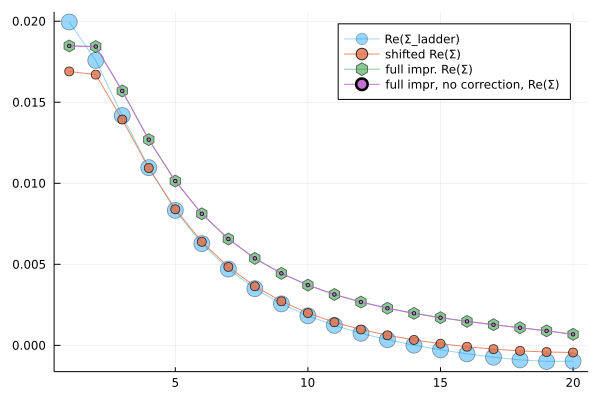

In [34]:
#plot(real(Σ_ladder[:,end]))
#plot!(real(Σ_ladder2[:,end]))
plot(real(Σ_ladder_corrected[:,end]), markershape=:circle, markersize=9, alpha=0.4, label="Re(Σ_ladder)")
plot!(real(Σ_ladder_corrected2[:,end]), markershape=:circle, markersize=5, alpha=0.8, label="shifted Re(Σ)")
plot!(real(Σ_ladder_corrected3[:,end]), markershape=:hexagon, markersize=6, alpha=0.6, label="full impr. Re(Σ)")
plot!(real(Σ_ladder3[:,end]), markershape=:circle, markersize=2, label="full impr, no correction, Re(Σ)")

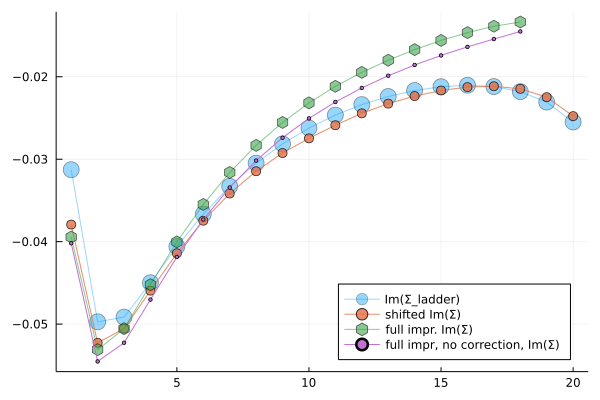

In [35]:
#plot(real(Σ_ladder[:,end]))
#plot!(real(Σ_ladder2[:,end]))
plot(imag(Σ_ladder_corrected[:,end]), markershape=:circle, markersize=9, alpha=0.4, label="Im(Σ_ladder)",legend=:bottomright)
plot!(imag(Σ_ladder_corrected2[:,end]), markershape=:circle, markersize=5, alpha=0.8, label="shifted Im(Σ)")
plot!(imag(Σ_ladder_corrected3[1:18,end]), markershape=:hexagon, markersize=6, alpha=0.6, label="full impr. Im(Σ)")
plot!(imag(Σ_ladder3[1:18,end]), markershape=:circle, markersize=2, label="full impr, no correction, Im(Σ)")

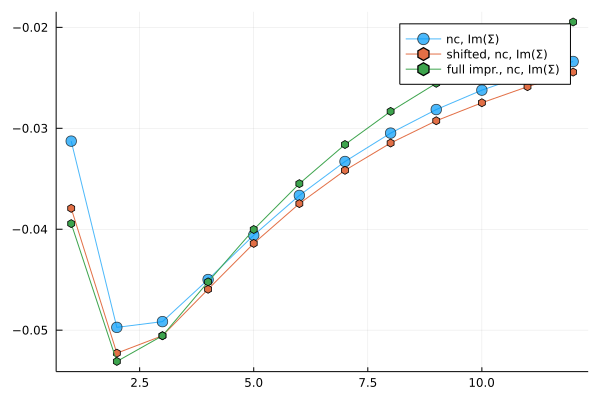

In [36]:
plot(imag(Σ_ladder_corrected[1:end-8,end]), markershape=:circle,markersize=6, alpha=0.7, label="nc, Im(Σ)")
plot!(imag(Σ_ladder_corrected2[1:end-8,end]), markershape=:hexagon, label="shifted, nc, Im(Σ)")
plot!(imag(Σ_ladder_corrected3[1:end-8,end]), markershape=:hexagon, label="full impr., nc, Im(Σ)")